In [1]:
import numpy as np
import scipy.optimize as OPT
import matplotlib.pyplot as plt
import scipy
from sksurv.nonparametric import kaplan_meier_estimator as KM
from scipy import integrate
from scipy.optimize import fsolve
import copy

In [2]:
def cox_loss(est_lam):
    li = 0
    lams = [est_lam[0]]*num_m + [est_lam[1]]*num_f
    fx_exp = np.exp(lams)
    for i in range(len(_.obs_flag)):
        if _.obs_flag[i] == True:
            tp_li = fx_exp[i] / fx_exp[_.survs>=_.survs[i]].sum()
            li += -np.log(tp_li)
    return li

def get_time(uni_ran, tp_h, tp_num):
    tp_surv = []
    tp_int = lambda x: integrate.quad(tp_h, 0, x)[0]
    tp_sf = lambda x: tp_int(x)+np.log(1-tp_r)
    tp_rs = np.random.uniform(size=tp_num)
    for tp_r in tp_rs:
        tp_surv.append(fsolve(tp_sf, x0=1)[0])
    return np.array(tp_surv)

# estimation using breslow method
def Breslow(ts, obs, hs):
    est_ts = []
    est_bh = []
    for i in range(len(ts)):
        t = ts[i]
        if obs[i]:
            tp_dom = np.exp(hs[ts>=t]).sum()
            if len(est_ts) == 0:
                est_bh.append(1/tp_dom)
            else:
                est_bh.append(1/tp_dom+est_bh[-1])
            est_ts.append(t)
    return np.array(est_ts), np.array(est_bh)

In [3]:
class _():
    obs_flag = []
    survs = []

In [4]:
def show_estimation_and_plot():
    m_suv_o = get_time(np.random.uniform(size=num_m), m_hazard, num_m)
    m_cen = np.random.exponential(scale=1/c_m, size=num_m)
    m_obs = (m_suv_o<=m_cen)
    m_suv = copy.deepcopy(m_suv_o)
    m_suv[m_obs==False]=m_cen[m_obs==False]
    
    f_suv_o = get_time(np.random.uniform(size=num_f), f_hazard, num_f)
    f_cen = np.random.exponential(scale=1/c_f, size=num_f)
    f_obs = (f_suv_o<=f_cen)
    f_suv = copy.deepcopy(f_suv_o)
    f_suv[f_obs==False]=f_cen[f_obs==False]

    survs_o = np.concatenate((m_suv_o, f_suv_o), axis=0)
    survs = np.concatenate((m_suv, f_suv), axis=0)
    obs_flag = np.concatenate((m_obs, f_obs), axis=0)
    _.obs_flag = obs_flag
    _.survs = survs
    bnds = ((0, 20),)*2
    res = OPT.minimize(cox_loss, [5, 5], method='Powell', bounds=bnds, tol=1e-5)
    print(res.x)
    print(res.x[0] - res.x[1])
    print()
    
    # plot the real and the biased survival rate
    plt.figure(figsize=(5,3))
    x_o, y_o, conf_int_o = KM(np.array([True]*len(survs_o)), survs_o, conf_type="log-log")
    x, y, conf_int = KM(obs_flag, survs, conf_type="log-log")
    plt.plot(x_o, y_o, label="original")
    plt.plot(x,y, label="with censorship")
    plt.legend()
    plt.title('estimated survival rate')
    plt.show()
    
    plt.figure(figsize=(5,3))
    zipped = sorted(zip(survs, obs_flag, [res.x[0]]*num_m+[res.x[1]]*num_f), key=lambda x: x[0])
    ts, obs, hs = [np.array([x[i] for x in zipped]) for i in range(3)]
    xs, ys = Breslow(ts, obs, hs)
    plt.plot(xs, ys*np.exp(res.x[1] - lam_f))
    plt.plot(xs, [integrate.quad(base_h, 0, x)[0] for x in xs])
    plt.title('estimated baseline hazard with Breslow estimator')
    plt.show()

C:\shared\groups\jrole001\geog0027\envs\gee\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[8.27573318 5.00000174]
3.2757314339798294



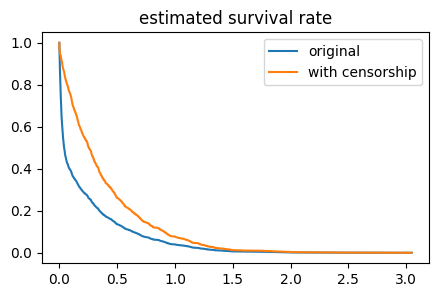

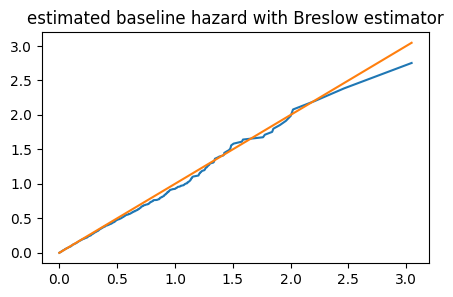

In [5]:
lam_m= 4
c_m = 1000

lam_f = 1
c_f = 0.00001

base_h = lambda x: 1
m_hazard = lambda x: base_h(x)*np.exp(lam_m)
f_hazard = lambda x: base_h(x)*np.exp(lam_f)

num_m = 1000
num_f = 1000

show_estimation_and_plot()

C:\shared\groups\jrole001\geog0027\envs\gee\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[7.93967152 4.99999912]
2.9396724020389655



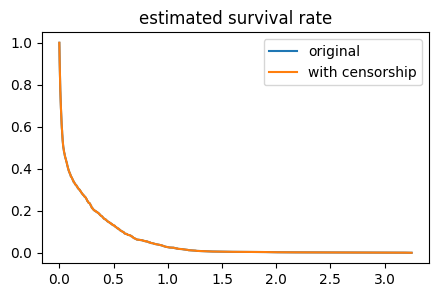

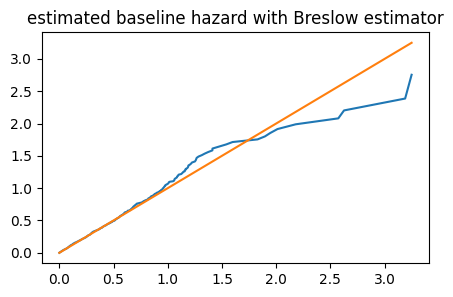

In [6]:
lam_m= 4
c_m = 0.00001

lam_f = 1
c_f = 0.00001

base_h = lambda x: 1
m_hazard = lambda x: base_h(x)*np.exp(lam_m)
f_hazard = lambda x: base_h(x)*np.exp(lam_f)

num_m = 1000
num_f = 1000

show_estimation_and_plot()

[4.01965408e-06 1.99457632e+01]
-19.94575913520983



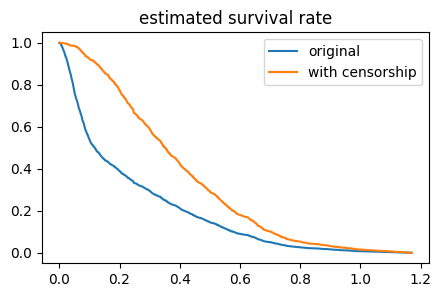

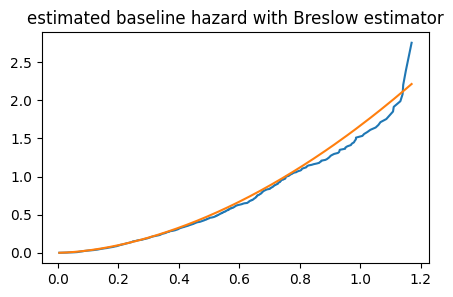

In [7]:
lam_m= 4
c_m = 1000

lam_f = 1
c_f = 0.00001

base_h = lambda x: x**0.5+x*2
m_hazard = lambda x: base_h(x)*np.exp(lam_m)
f_hazard = lambda x: base_h(x)*np.exp(lam_f)

num_m = 1000
num_f = 1000

show_estimation_and_plot()

[8.02468347 5.00000215]
3.0246813214893367



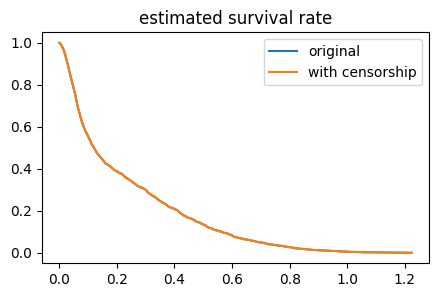

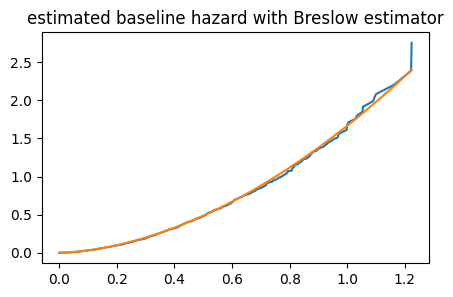

In [8]:
lam_m= 4
c_m = 0.00001

lam_f = 1
c_f = 0.00001

base_h = lambda x: x**0.5+x*2
m_hazard = lambda x: base_h(x)*np.exp(lam_m)
f_hazard = lambda x: base_h(x)*np.exp(lam_f)

num_m = 1000
num_f = 1000

show_estimation_and_plot()